# SER Using Hubert

In [2]:
import time
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir dataset
!unzip drive/MyDrive/shemo-persian-speech-emotion-detection-database.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/transcript/final script/F24A22.tra  
  inflating: dataset/transcript/final script/F24A23.tra  
  inflating: dataset/transcript/final script/F24A24.tra  
  inflating: dataset/transcript/final script/F24A25.tra  
  inflating: dataset/transcript/final script/F24A26.tra  
  inflating: dataset/transcript/final script/F24A27.tra  
  inflating: dataset/transcript/final script/F24A28.tra  
  inflating: dataset/transcript/final script/F24A29.tra  
  inflating: dataset/transcript/final script/F24A30.tra  
  inflating: dataset/transcript/final script/F24A31.tra  
  inflating: dataset/transcript/final script/F24A32.tra  
  inflating: dataset/transcript/final script/F24A33.tra  
  inflating: dataset/transcript/final script/F24A34.tra  
  inflating: dataset/transcript/final script/F24A35.tra  
  inflating: dataset/transcript/final script/F24A36.tra  
  inflating: dataset/transcript/final script/F24A37.tra  
  inflating: dataset/

In [5]:
import os

dataset_dir = "/content/dataset"
paths = []
labels = []
emotions = []
genders = []

for dir_name, _, files_name in os.walk(dataset_dir):
    for filename in files_name:
        if filename.lower().endswith('.wav'):
            file_path = os.path.join(dataset_dir, dir_name, filename)
            paths.append(file_path)

            label = filename.split('_')[-1]
            label = label.split('.')[0]
            emotion = label[3]
            gender = label[0]

            emotions.append(emotion)
            genders.append(gender)
            labels.append(label.lower())

    if len(paths) == 2800:
        break

print('Dataset is Loaded')


Dataset is Loaded


In [6]:
paths

['/content/dataset/female/F20N10.wav',
 '/content/dataset/female/F21S03.wav',
 '/content/dataset/female/F19N18.wav',
 '/content/dataset/female/F19N15.wav',
 '/content/dataset/female/F19N16.wav',
 '/content/dataset/female/F07A02.wav',
 '/content/dataset/female/F21A16.wav',
 '/content/dataset/female/F12N08.wav',
 '/content/dataset/female/F21N21.wav',
 '/content/dataset/female/F02A02.wav',
 '/content/dataset/female/F14H02.wav',
 '/content/dataset/female/F10A19.wav',
 '/content/dataset/female/F05N13.wav',
 '/content/dataset/female/F09W04.wav',
 '/content/dataset/female/F05N26.wav',
 '/content/dataset/female/F01A08.wav',
 '/content/dataset/female/F23A09.wav',
 '/content/dataset/female/F24W08.wav',
 '/content/dataset/female/F12A07.wav',
 '/content/dataset/female/F24S05.wav',
 '/content/dataset/female/F23A18.wav',
 '/content/dataset/female/F21N11.wav',
 '/content/dataset/female/F09S11.wav',
 '/content/dataset/female/F01A03.wav',
 '/content/dataset/female/F03S17.wav',
 '/content/dataset/female

In [7]:
# import pandas as pd
# df = pd.DataFrame()
# df['speech'] = paths
# df['label'] = labels
# df['emotion']=emotions
# df['gender']=genders

In [8]:
import torch
device="cuda"
print(device)

cuda


### 2.1 Load dataset

In [9]:
import os
import pandas as pd

emotion = []
gender = []
path = []
mdf = pd.DataFrame()
mdf['speech'] = paths
mdf['label'] = labels
mdf['emotion']=emotions
mdf['gender']=genders
mdf.emotion.value_counts()

A    1059
N    1028
S     449
W     225
H     201
F      38
Name: emotion, dtype: int64

In [10]:
mdf

,speech,label,emotion,gender
0,/content/dataset/female/F20N10.wav,f20n10,N,F
1,/content/dataset/female/F21S03.wav,f21s03,S,F
2,/content/dataset/female/F19N18.wav,f19n18,N,F
3,/content/dataset/female/F19N15.wav,f19n15,N,F
4,/content/dataset/female/F19N16.wav,f19n16,N,F
...,...,...,...,...
2995,/content/dataset/male/M03A01.wav,m03a01,A,M
2996,/content/dataset/male/M27N33.wav,m27n33,N,M
2997,/content/dataset/male/M20S02.wav,m20s02,S,M
2998,/content/dataset/male/M25A24.wav,m25a24,A,M


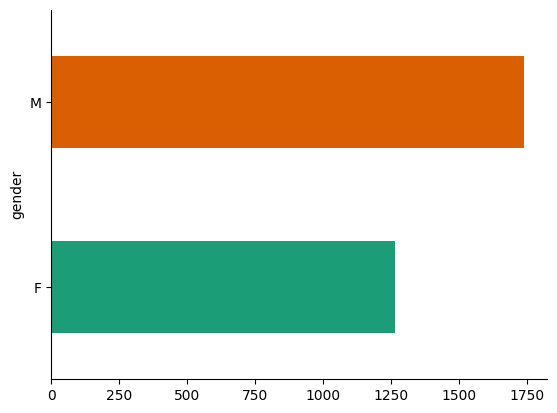

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
mdf.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

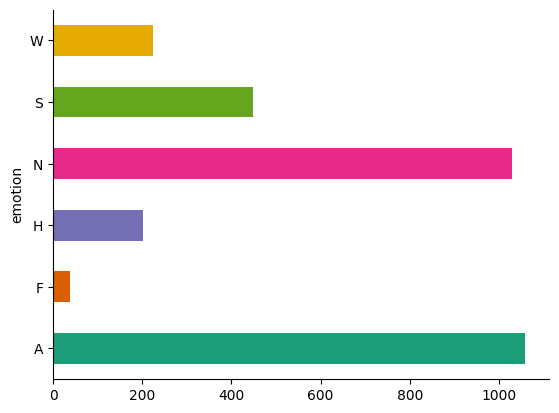

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
mdf.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

df = mdf

X = df.drop([ 'emotion'], axis=1)
y = df['emotion']

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

print(balanced_df['emotion'].value_counts())


N    1059
S    1059
A    1059
H    1059
W    1059
F    1059
Name: emotion, dtype: int64


In [13]:
mdf=balanced_df

In this demonstration, we only choose 4 emotions, neutral, happy, sad and angry.

In [15]:
mdf.drop("label",axis=1)

,speech,emotion,gender
0,/content/dataset/female/F19N05.wav,N,F
1,/content/dataset/female/F24A41.wav,A,F
2,/content/dataset/female/F21S28.wav,S,F
3,/content/dataset/female/F23H02.wav,H,F
4,/content/dataset/female/F15A04.wav,A,F
...,...,...,...
2995,/content/dataset/male/M11H03.wav,H,M
2996,/content/dataset/male/M12N38.wav,N,M
2997,/content/dataset/male/M32S04.wav,S,M
2998,/content/dataset/male/M34H03.wav,H,M


In [16]:
# mdf = mdf[(mdf["emotion"]=="N") | (mdf["emotion"]=="H") | (mdf["emotion"]=="S") | (mdf["emotion"]=="A")]
# # mdf = mdf[(mdf["label"]=="1") | (mdf["label"]=="H") | (mdf["label"]=="S") | (mdf["label"]=="A")]

In [17]:
import pandas as pd
def map_label(row):
    emotion = row['emotion']
    gender = row['gender']

    if emotion == 'A' and gender == 'M':
        return 1
    elif emotion == 'A' and gender == 'F':
        return 2
    elif emotion == 'S' and gender == 'M':
        return 3
    elif emotion == 'S' and gender == 'F':
        return 4
    elif emotion == 'N' and gender == 'M':
        return 5
    elif emotion == 'N' and gender == 'F':
        return 6
    elif emotion == 'H' and gender == 'M':
        return 7
    elif emotion == 'H' and gender == 'F':
        return 8
    elif emotion == 'W' and gender == 'M':
        return 9
    elif emotion == 'W' and gender == 'F':
        return 10
    elif emotion == 'F' and gender == 'M':
        return 11
    elif emotion == 'F' and gender == 'F':
        return 12

mdf['label'] = mdf.apply(map_label, axis=1)

print(mdf)


                                  speech  label emotion gender
0     /content/dataset/female/F19N05.wav      6       N      F
1     /content/dataset/female/F24A41.wav      2       A      F
2     /content/dataset/female/F21S28.wav      4       S      F
3     /content/dataset/female/F23H02.wav      8       H      F
4     /content/dataset/female/F15A04.wav      2       A      F
...                                  ...    ...     ...    ...
2995    /content/dataset/male/M11H03.wav      7       H      M
2996    /content/dataset/male/M12N38.wav      5       N      M
2997    /content/dataset/male/M32S04.wav      3       S      M
2998    /content/dataset/male/M34H03.wav      7       H      M
2999    /content/dataset/male/M52N02.wav      5       N      M

[3000 rows x 4 columns]


Split into training data and test data.

In [18]:
train_df = mdf.sample(frac=0.8)
test_df = mdf.drop(train_df.index)
val_df=test_df.sample(frac=0.5)
test_df=test_df.drop(val_df.index)

In [19]:
train_df.shape, test_df.shape, val_df.shape

((2400, 4), (300, 4), (300, 4))

Let's have a look at the training data.

In [20]:
train_df

,speech,label,emotion,gender
2520,/content/dataset/male/M12N57.wav,5,N,M
2151,/content/dataset/male/M43W04.wav,9,W,M
2193,/content/dataset/male/M28S19.wav,3,S,M
2156,/content/dataset/male/M13H02.wav,7,H,M
727,/content/dataset/female/F06H03.wav,8,H,F
...,...,...,...,...
2884,/content/dataset/male/M53A09.wav,1,A,M
2172,/content/dataset/male/M25A18.wav,1,A,M
785,/content/dataset/female/F10A27.wav,2,A,F
12,/content/dataset/female/F30F01.wav,12,F,F


In [22]:
import IPython.display as ipd
id = 309
print(train_df.iloc[id])
ipd.Audio(data=train_df.iloc[id]["speech"], autoplay=True, rate=16000)

speech     /content/dataset/female/F24A43.wav
label                                       2
emotion                                     A
gender                                      F
Name: 935, dtype: object


### 2.2 Tokenization

In [23]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00


In [24]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa


In [25]:

def map_to_array(example):
    speech, _ = librosa.load(example["speech"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")


Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

In [26]:
train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

In [27]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = [self._map_label(x) for x in labels]

    def _map_label(self, label):
        label_mapping = {1: 0, 2: 0, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 4, 10: 5, 11: 6, 12: 6}
        return label_mapping[label]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = EmotionDataset(train_encodings, list(train_data["label"]))
test_dataset = EmotionDataset(test_encodings, list(test_data["label"]))


## 3. Loading the Model and Optimizer

In [28]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

model = HubertForSequenceClassification.from_pretrained("superb/hubert-base-superb-ks")
model.to(device)
optim = AdamW(model.parameters(), lr=1e-5)

config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-base-superb-ks were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_v', 'hubert.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-base-superb-ks and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

## 4. Training

In [29]:
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"],dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [30]:
# device='cpu'

In [31]:
from torch.utils.data import DataLoader

epochs = 5
model.train()
train_loss = []
train_accuracies = []

for epoch_i in range(epochs):
    print(f'Epoch {epoch_i + 1}/{epochs}')
    time.sleep(0.3)

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
    correct = 0
    count = 0
    epoch_loss = []

    pbar = tqdm(train_loader, desc=f'Training Epoch {epoch_i + 1}/{epochs}')
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()

        predictions = predict(outputs)
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'Loss': f'{loss.item():.3f}',
            'Accuracy': f'{accuracy:.3f}'
        })

        epoch_loss.append(loss.item())

    pbar.close()
    train_loss.extend(epoch_loss)
    train_accuracies.append(accuracy)


Epoch 1/5


100%|██████████| 1200/1200 [03:05<00:00,  6.49it/s, Loss=3.335, Accuracy=0.466]


Epoch 2/5


100%|██████████| 1200/1200 [03:05<00:00,  6.45it/s, Loss=4.863, Accuracy=0.549]


Epoch 3/5


100%|██████████| 1200/1200 [03:05<00:00,  6.46it/s, Loss=7.113, Accuracy=0.619]


Epoch 4/5


100%|██████████| 1200/1200 [03:05<00:00,  6.48it/s, Loss=0.096, Accuracy=0.650]


Epoch 5/5


100%|██████████| 1200/1200 [03:04<00:00,  6.49it/s, Loss=0.004, Accuracy=0.678]


In [32]:
torch.save(model.state_dict(), 'trained_model.pth')


Visualise the training loss and accuracy.

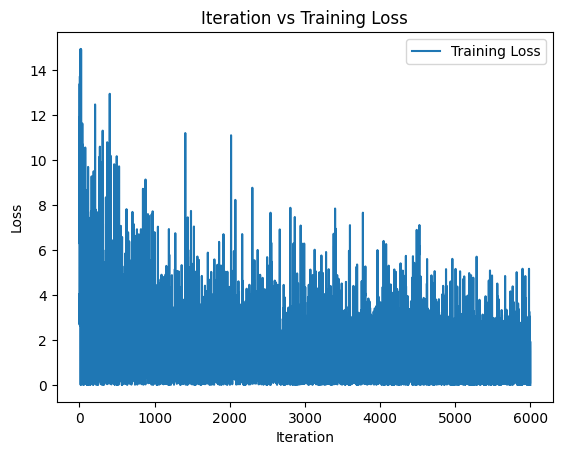

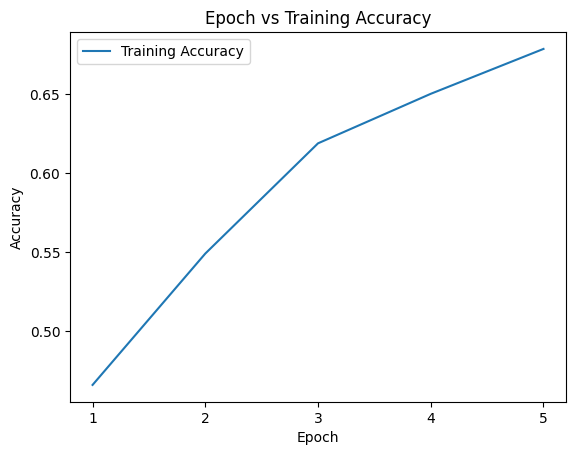

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")
plt.legend()
plt.show()

acc_X = np.arange(len(train_accuracies)) + 1
plt.plot(acc_X, train_accuracies, "-", label="Training Accuracy")
plt.xticks(acc_X)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")
plt.legend()
plt.show()


## 5. Testing

Test the model.

In [34]:
from torch.utils.data import DataLoader

# Get test data by DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Start testing
model.eval()

with torch.no_grad():

    correct = 0
    count = 0
    record = {"labels": [], "predictions": []}

    pbar = tqdm(test_loader, desc="Testing")
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        predictions = predict(outputs)

        # Count accuracy
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        # Show progress along with metrics
        pbar.set_postfix({
            'Loss': f'{loss.item():.3f}',
            'Accuracy': f'{accuracy:.3f}'
        })

        # Record the results
        record["labels"] += labels.cpu().numpy().tolist()
        record["predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("Final accuracy on the test dataset: %s%%" % round(accuracy * 100, 4))


100%|██████████| 300/300 [00:07<00:00, 41.63it/s, loss=0.713, accuracy=0.737]


The final accuracy on the test dataset: 73.6667%


Check the result.

In [35]:
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Ground Truth","Model Prediction"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Ground Truth"] = df_record.apply(lambda x: get_emotion(x["Ground Truth"]), axis=1)
df_record["Model Prediction"] = df_record.apply(lambda x: get_emotion(x["Model Prediction"]), axis=1)

df = pd.concat([test_df.reset_index(), df_record["Model Prediction"]], axis=1)
df["emotion"] = df.apply(lambda x: x["emotion"][:3], axis=1)

df[df["emotion"]!=df["Model Prediction"]]

,index,speech,label,emotion,gender,Model Prediction
0,20,/content/dataset/female/F13A01.wav,2,A,F,yes
1,22,/content/dataset/female/F02N05.wav,6,N,F,yes
2,27,/content/dataset/female/F09A08.wav,2,A,F,yes
3,34,/content/dataset/female/F24S21.wav,4,S,F,yes
4,43,/content/dataset/female/F23N08.wav,6,N,F,yes
...,...,...,...,...,...,...
295,2958,/content/dataset/male/M50A06.wav,1,A,M,yes
296,2970,/content/dataset/male/M01W01.wav,9,W,M,no
297,2971,/content/dataset/male/M28N18.wav,5,N,M,up
298,2979,/content/dataset/male/M50A08.wav,1,A,M,yes


Display the Confusion Matrix of the result.

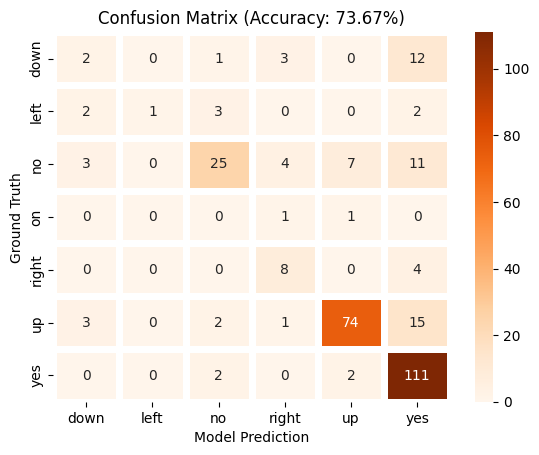

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pd.crosstab(df_record["Ground Truth"], df_record["Model Prediction"]), cmap='Oranges', annot=True, fmt='g', linewidths=5)

accuracy = (df_record["Ground Truth"] == df_record["Model Prediction"]).mean()

plt.title(f"Confusion Matrix (Accuracy: {accuracy*100:.2f}%)")
plt.show()
